# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

# Print formatted HTML to verify structure
print(soup.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

In [11]:
# Extract all rows of data

table = soup.find('table', class_='table')

rows = table.find_all('tr')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [20]:
# Create an empty list for the data
data_list = []

# Extract headers from the first row (assuming it's the first row in 'rows')
header_row = rows[0].find_all('th')  # Get header cells
headers = [header.get_text(strip=True) for header in header_row]  # Extract header text

# Loop through the remaining rows (starting from index 1)
for row in rows[1:]:
    cols = row.find_all('td')  # Get data cells
    cols_text = [col.get_text(strip=True) for col in cols]  # Extract text
    data_list.append(cols_text)  # Append the data to the list

In [21]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_list, columns=headers)


In [22]:
# Confirm DataFrame was created successfully
(df)


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [23]:
# Examine data type of each column
print("\nData Types of Each Column:")
print(df.dtypes)


Data Types of Each Column:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [24]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', and 'month' to int32
df['sol'] = df['sol'].astype('int32')
df['ls'] = df['ls'].astype('int32')
df['month'] = df['month'].astype('int32')

# Convert 'min_temp' and 'pressure' to float64
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

# Check the updated data types
print("\nUpdated Data Types of Each Column:")
print(df.dtypes)


Updated Data Types of Each Column:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [25]:
# Confirm type changes were successful by examining data types again
print("\nConfirmed Data Types of Each Column:")
print(df.dtypes)


Confirmed Data Types of Each Column:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [26]:
# 1. How many months are there on Mars?

unique_months = df['month'].unique()

# Count the number of unique months
number_of_months = len(unique_months)

# Display the result
print(f"There are {number_of_months} unique months recorded on Mars.")

There are 12 unique months recorded on Mars.


In [27]:
# 2. How many sols (Martian days) worth of data are there?
# Count the number of sols (Martian days) worth of data
number_of_sols = df['sol'].count()

# Display the result
print(f"There are {number_of_sols} sols worth of data.")

There are 1867 sols worth of data.


In [28]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the result
print("Average Minimum Temperature by Month:")
print(average_min_temp_by_month)

Average Minimum Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


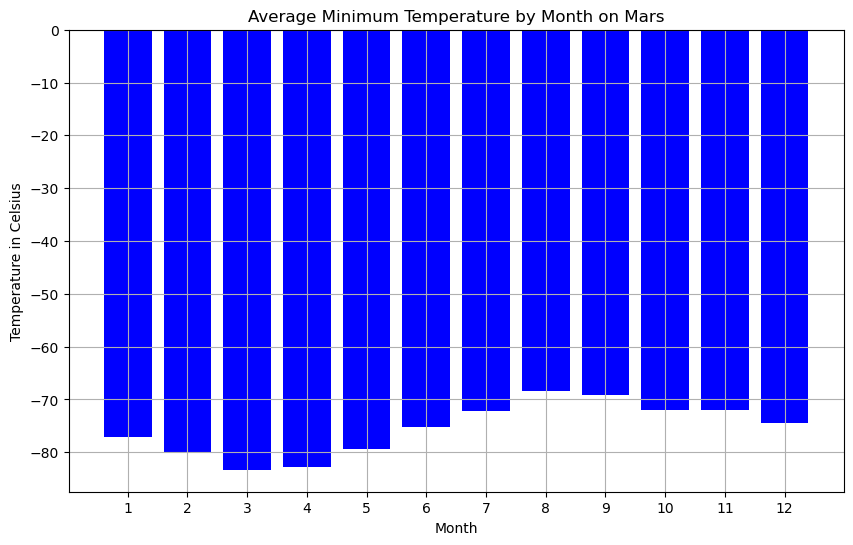

In [66]:
# Plot the average minimum temperature by month

plt.figure(figsize=(10, 6))
plt.bar(average_min_temp_by_month['month'], average_min_temp_by_month['min_temp'], color='blue')

# Adding titles and labels
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(average_min_temp_by_month['month']) 

# Show the plot
plt.grid()
plt.show()

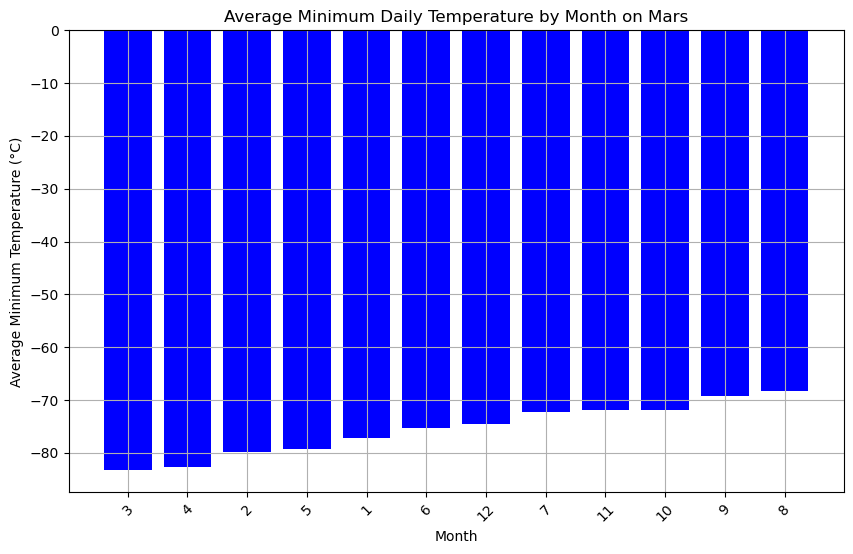

Coldest Month: Month 3.0 with an average minimum temperature of -83.30729166666667 °C
Hottest Month: Month 8.0 with an average minimum temperature of -68.38297872340425 °C


In [46]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

plt.figure(figsize=(10, 6))
plt.bar(sorted_temp['month'].astype(str), sorted_temp['min_temp'], color='blue')

# Adding titles and labels
plt.title('Average Minimum Daily Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=45) 

# Show the plot
plt.grid()
plt.show()

# Display the coldest and hottest months
print(f"Coldest Month: Month {coldest_month['month']} with an average minimum temperature of {coldest_month['min_temp']} °C")
print(f"Hottest Month: Month {hottest_month['month']} with an average minimum temperature of {hottest_month['min_temp']} °C")

In [38]:
# 4. What is the average pressure by month?
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Convert the Series to a DataFrame
average_pressure_table = average_pressure_by_month.reset_index()

# Display the average pressure for each month as a table
print(average_pressure_table)

    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


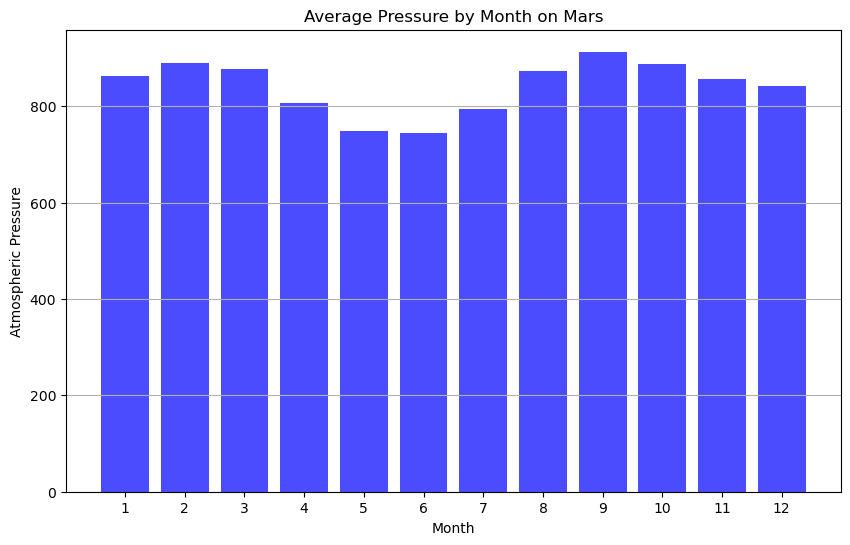

In [65]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(average_pressure_table['month'], average_pressure_table['pressure'], color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(average_pressure_table['month'])  
plt.grid(axis='y') 

# Show the plot
plt.show()

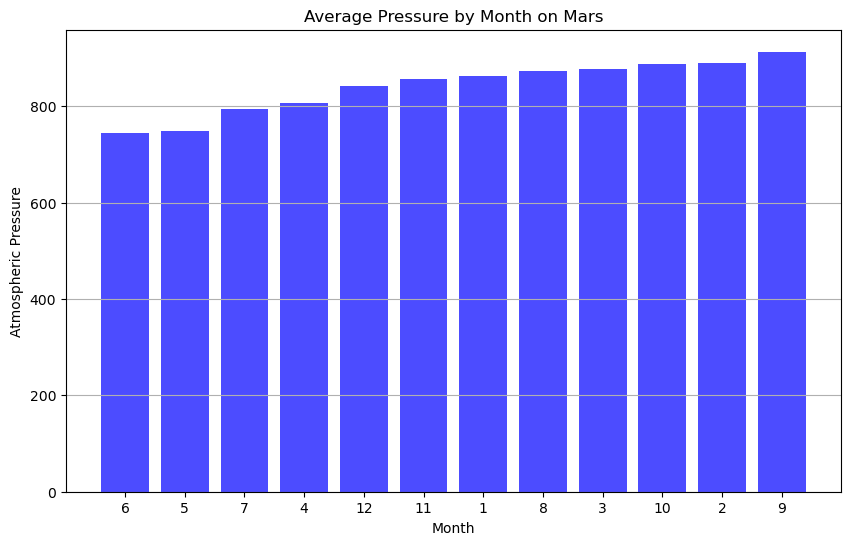

In [51]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure_table = average_pressure_table.sort_values(by='pressure')

# Plotting the average pressure by month as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_pressure_table['month'].astype(str), sorted_pressure_table['pressure'], color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(sorted_pressure_table['month'].astype(str))
plt.grid(axis='y')

# Show the plot
plt.show()

# Print the lowest and highest pressure months
lowest_pressure_month = sorted_pressure_table.iloc[0]
highest_pressure_month = sorted_pressure_table.iloc[-1]

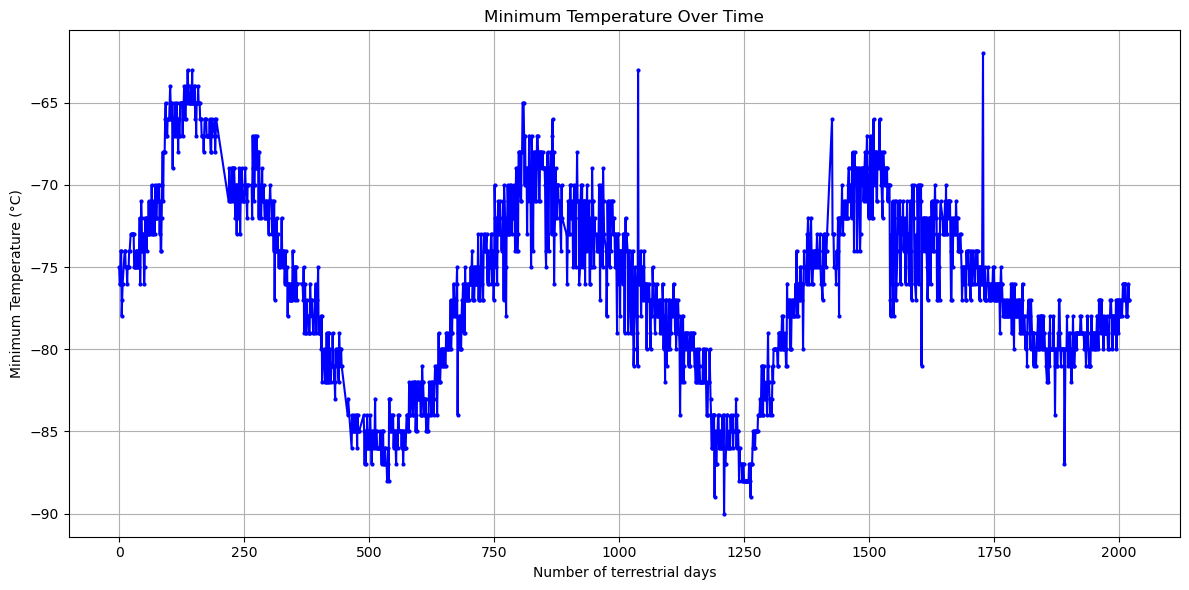

In [64]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Convert 'terrestrial_date' column to datetime if it's not already
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Create a new column for days since the start of the dataset
df['days'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

# Plotting the daily minimum temperature
plt.figure(figsize=(12, 6))
plt.plot(df['days'], df['min_temp'], marker='o', linestyle='-', color='blue', markersize=2)

# Adding titles and labels
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature (°C)')
plt.grid()

# Show the plot
plt.tight_layout() 
plt.show()

#### Minimum Temperature

-90 degrees Celsius. 

In [63]:
minimum_temperature = df['min_temp'].min()
minimum_temperature

-90.0

#### Atmospheric Pressure

The minimum atmospheric pressure recorded is: 727.0 Pa
The maximum atmospheric pressure recorded is: 925.0 Pa
The average atmospheric pressure recorded is: 841.0664167113016 Pa

In [67]:
pressure_column = 'pressure' 

# Calculate minimum, maximum, and average atmospheric pressure
min_pressure = df[pressure_column].min()
max_pressure = df[pressure_column].max()
average_pressure = df[pressure_column].mean()

# Display the results
print(f"The minimum atmospheric pressure recorded is: {min_pressure} Pa")
print(f"The maximum atmospheric pressure recorded is: {max_pressure} Pa")
print(f"The average atmospheric pressure recorded is: {average_pressure} Pa")

The minimum atmospheric pressure recorded is: 727.0 Pa
The maximum atmospheric pressure recorded is: 925.0 Pa
The average atmospheric pressure recorded is: 841.0664167113016 Pa


#### Year Length

The length of a year is 288.71 days approximately. 

In [70]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
start_date = df['terrestrial_date'].min()
end_date = df['terrestrial_date'].max()

# Calculate the length of the dataset in days
total_days = (end_date - start_date).days

# Calculate the number of years in the dataset
number_of_years = (end_date.year - start_date.year) + 1 

# Calculate the average length of a year
average_year_length = total_days / number_of_years

# Display the results
print(f"The average length of a year based on the dataset is: {average_year_length:.2f} days")

The average length of a year based on the dataset is: 288.71 days


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [71]:
# Write the data to a CSV
output_file = 'output_data.csv'

df.to_csv(output_file, index=False)

In [72]:
browser.quit()